# Loneliness and Deprivation

## Read in IMD and loneliness index data for England

In [282]:
import pandas as pd
import numpy as np
import seaborn as sns

In [283]:
imd = pd.read_csv('england/imd2015eng.csv')

In [284]:
loneliness = pd.read_csv('england/final_data.csv')

IMD data is a single snapshot for each LSOA. Loneliness in theory has entries for each year for each postcode but in practice is limited to a single year. Will need to produce an aggregate view for each LSOA to fuse with the IMD data

In [285]:
agg_cols = {'loneills': 'mean', 'addiction_zscore' : 'mean',  }
loneliness_per_lsoa11_2 = loneliness.groupby(['lsoa11', 'Year'], as_index=False).agg(agg_cols)

loneliness_imd2 = pd.merge(loneliness_per_lsoa11_2, imd, how='left', left_on=['lsoa11'], right_on=['LSOA code (2011)'])

In [286]:
loneliness_imd2

,lsoa11,Year,loneills,addiction_zscore,LSOA code (2011),LSOA name (2011),Local Authority District code (2013),Local Authority District name (2013),Index of Multiple Deprivation (IMD) Score,Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived),...,Indoors Sub-domain Rank (where 1 is most deprived),Indoors Sub-domain Decile (where 1 is most deprived 10% of LSOAs),Outdoors Sub-domain Score,Outdoors Sub-domain Rank (where 1 is most deprived),Outdoors Sub-domain Decile (where 1 is most deprived 10% of LSOAs),Total population: mid 2012 (excluding prisoners),Dependent Children aged 0-15: mid 2012 (excluding prisoners),Population aged 16-59: mid 2012 (excluding prisoners),Older population aged 60 and over: mid 2012 (excluding prisoners),Working age population 18-59/64: for use with Employment Deprivation Domain (excluding prisoners)
0,E01000007,2015,-3.032939,-0.001290,E01000007,Barking and Dagenham 015A,E09000002,Barking and Dagenham,42.513,3778.0,...,11759.0,4.0,1.279,2348.0,1.0,1478.0,372.0,1003.0,103.0,979.50
1,E01000009,2015,-6.786468,-0.101102,E01000009,Barking and Dagenham 016B,E09000002,Barking and Dagenham,33.412,6750.0,...,9427.0,3.0,1.027,3794.0,2.0,1839.0,340.0,1257.0,242.0,1233.50
2,E01000010,2015,-1.346273,-0.101102,E01000010,Barking and Dagenham 015C,E09000002,Barking and Dagenham,30.914,7796.0,...,5411.0,2.0,0.658,6946.0,3.0,3120.0,741.0,2241.0,138.0,2226.25
3,E01000012,2015,-2.063601,-0.101102,E01000012,Barking and Dagenham 015D,E09000002,Barking and Dagenham,36.910,5475.0,...,4492.0,2.0,0.992,4034.0,2.0,2007.0,619.0,1282.0,106.0,1248.50
4,E01000017,2015,-0.972582,-0.101102,E01000017,Barking and Dagenham 009C,E09000002,Barking and Dagenham,40.563,4357.0,...,11830.0,4.0,0.525,8498.0,3.0,1622.0,409.0,991.0,222.0,957.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6266,E01033758,2015,-0.932807,-0.101102,E01033758,Liverpool 060B,E08000012,Liverpool,35.068,6121.0,...,2509.0,1.0,1.704,1003.0,1.0,1997.0,61.0,1868.0,68.0,1904.25
6267,E01033759,2015,-2.025628,-0.101102,E01033759,Liverpool 010F,E08000012,Liverpool,54.124,1582.0,...,5987.0,2.0,0.834,5284.0,2.0,1195.0,283.0,702.0,210.0,716.25
6268,E01033762,2015,1.970892,-0.101102,E01033762,Liverpool 060E,E08000012,Liverpool,26.541,9976.0,...,6832.0,3.0,1.310,2210.0,1.0,1795.0,50.0,1669.0,76.0,1678.25
6269,E01033764,2015,0.166426,0.553710,E01033764,Liverpool 022E,E08000012,Liverpool,76.865,72.0,...,25196.0,8.0,1.405,1835.0,1.0,2158.0,339.0,1249.0,570.0,1303.00


In [287]:
# here is where I rename those columns
big_dict = {'Outdoors Sub-domain Score':"outdoor_score",
                               'Year': 'year',
                               'LSOA code (2011)': 'lsoa_code',
                               'LSOA name (2011)': 'lsoa_name',
                               'Local Authority District code (2013)': 'district_code',
                               'Local Authority District name (2013)': 'district_name',
                               'Index of Multiple Deprivation (IMD) Score': 'imd_score',
                               'Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived)': 'imd_rank',
                               'Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs)': 'imd_decile',
                               'Income Score (rate)': 'income_score',
                            'Income Rank (where 1 is most deprived)': 'income_rank',
       'Income Decile (where 1 is most deprived 10% of LSOAs)': 'income_decile',
       'Employment Score (rate)': 'employment_rate', 
                               'Employment Rank (where 1 is most deprived)': 'employment_score',
       'Employment Decile (where 1 is most deprived 10% of LSOAs)': 'employment_decile',
       'Education, Skills and Training Score': 'education_score',
       'Education, Skills and Training Rank (where 1 is most deprived)': 'education_rank',
       'Education, Skills and Training Decile (where 1 is most deprived 10% of LSOAs)': 'education_decile',
       'Health Deprivation and Disability Score': 'health_score',
       'Health Deprivation and Disability Rank (where 1 is most deprived)': 'health_rank',
       'Health Deprivation and Disability Decile (where 1 is most deprived 10% of LSOAs)': 'health_decile',
       'Crime Score': 'crime_score',
                               'Crime Rank (where 1 is most deprived)': 'crime_rank',
       'Crime Decile (where 1 is most deprived 10% of LSOAs)': 'crime_decile',
       'Barriers to Housing and Services Score': 'housing_score',
       'Barriers to Housing and Services Rank (where 1 is most deprived)': 'housing_rank',
       'Barriers to Housing and Services Decile (where 1 is most deprived 10% of LSOAs)': 'housing_decile',
       'Living Environment Score': 'living_score',
       'Living Environment Rank (where 1 is most deprived)': 'living_rank',
       'Living Environment Decile (where 1 is most deprived 10% of LSOAs)': 'living_decile',
       'Income Deprivation Affecting Children Index (IDACI) Score (rate)':'poor_children_score',
       'Income Deprivation Affecting Children Index (IDACI) Rank (where 1 is most deprived)': 'poor_children_rank',
       'Income Deprivation Affecting Children Index (IDACI) Decile (where 1 is most deprived 10% of LSOAs)': 'poor_children_decile',
       'Income Deprivation Affecting Older People (IDAOPI) Score (rate)': 'poor_older_score',
       'Income Deprivation Affecting Older People (IDAOPI) Rank (where 1 is most deprived)': 'poor_older_rank',
       'Income Deprivation Affecting Older People (IDAOPI) Decile (where 1 is most deprived 10% of LSOAs)': 'poor_older_decile',
       'Children and Young People Sub-domain Score': 'young_sub_score',
       'Children and Young People Sub-domain Rank (where 1 is most deprived)': 'young_sub_rank',
       'Children and Young People Sub-domain Decile (where 1 is most deprived 10% of LSOAs)':'young_sub_decile',
       'Adult Skills Sub-domain Score': 'adult_skills_sub_score',
       'Adult Skills Sub-domain Rank (where 1 is most deprived)': 'adult_skills_sub_rank',
       'Adult Skills Sub-domain Decile (where 1 is most deprived 10% of LSOAs)': 'adult_skills_sub_decile',
       'Geographical Barriers Sub-domain Score': 'geog_barriers_sub_score',
       'Geographical Barriers Sub-domain Rank (where 1 is most deprived)': 'geog_barriers_sub_rank',
       'Geographical Barriers Sub-domain Decile (where 1 is most deprived 10% of LSOAs)': 'geog_barriers_sub_decile',
       'Wider Barriers Sub-domain Score': 'wider_barriers_sub_score',
       'Wider Barriers Sub-domain Rank (where 1 is most deprived)': 'wider_barriers_sub_rank',
       'Wider Barriers Sub-domain Decile (where 1 is most deprived 10% of LSOAs)': 'wider_barriers_sub_decile',
       'Indoors Sub-domain Score': 'indoor_sub_score',
       'Indoors Sub-domain Rank (where 1 is most deprived)': 'indoor_sub_rank',
       'Indoors Sub-domain Decile (where 1 is most deprived 10% of LSOAs)': 'indoor_sub_decile',
       'Outdoors Sub-domain Score': 'outdoor_sub_score',
       'Outdoors Sub-domain Rank (where 1 is most deprived)': 'outdoor_sub_rank',
       'Outdoors Sub-domain Decile (where 1 is most deprived 10% of LSOAs)': 'outdoor_sub_decile',
       'Total population: mid 2012 (excluding prisoners)':'total_population',
       'Dependent Children aged 0-15: mid 2012 (excluding prisoners)':'aged_under_15_population',
       'Population aged 16-59: mid 2012 (excluding prisoners)': 'aged_16-59_population',
       'Older population aged 60 and over: mid 2012 (excluding prisoners)': 'aged_over_60_population',
       'Working age population 18-59/64: for use with Employment Deprivation Domain (excluding prisoners) ': 'working_age_population'}



#loneliness_imd = loneliness_imd.rename(columns=big_dict)

loneliness_imd2 = loneliness_imd2.rename(columns=big_dict)

In [288]:
loneliness_imd2

,lsoa11,year,loneills,addiction_zscore,lsoa_code,lsoa_name,district_code,district_name,imd_score,imd_rank,...,indoor_sub_rank,indoor_sub_decile,outdoor_sub_score,outdoor_sub_rank,outdoor_sub_decile,total_population,aged_under_15_population,aged_16-59_population,aged_over_60_population,working_age_population
0,E01000007,2015,-3.032939,-0.001290,E01000007,Barking and Dagenham 015A,E09000002,Barking and Dagenham,42.513,3778.0,...,11759.0,4.0,1.279,2348.0,1.0,1478.0,372.0,1003.0,103.0,979.50
1,E01000009,2015,-6.786468,-0.101102,E01000009,Barking and Dagenham 016B,E09000002,Barking and Dagenham,33.412,6750.0,...,9427.0,3.0,1.027,3794.0,2.0,1839.0,340.0,1257.0,242.0,1233.50
2,E01000010,2015,-1.346273,-0.101102,E01000010,Barking and Dagenham 015C,E09000002,Barking and Dagenham,30.914,7796.0,...,5411.0,2.0,0.658,6946.0,3.0,3120.0,741.0,2241.0,138.0,2226.25
3,E01000012,2015,-2.063601,-0.101102,E01000012,Barking and Dagenham 015D,E09000002,Barking and Dagenham,36.910,5475.0,...,4492.0,2.0,0.992,4034.0,2.0,2007.0,619.0,1282.0,106.0,1248.50
4,E01000017,2015,-0.972582,-0.101102,E01000017,Barking and Dagenham 009C,E09000002,Barking and Dagenham,40.563,4357.0,...,11830.0,4.0,0.525,8498.0,3.0,1622.0,409.0,991.0,222.0,957.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6266,E01033758,2015,-0.932807,-0.101102,E01033758,Liverpool 060B,E08000012,Liverpool,35.068,6121.0,...,2509.0,1.0,1.704,1003.0,1.0,1997.0,61.0,1868.0,68.0,1904.25
6267,E01033759,2015,-2.025628,-0.101102,E01033759,Liverpool 010F,E08000012,Liverpool,54.124,1582.0,...,5987.0,2.0,0.834,5284.0,2.0,1195.0,283.0,702.0,210.0,716.25
6268,E01033762,2015,1.970892,-0.101102,E01033762,Liverpool 060E,E08000012,Liverpool,26.541,9976.0,...,6832.0,3.0,1.310,2210.0,1.0,1795.0,50.0,1669.0,76.0,1678.25
6269,E01033764,2015,0.166426,0.553710,E01033764,Liverpool 022E,E08000012,Liverpool,76.865,72.0,...,25196.0,8.0,1.405,1835.0,1.0,2158.0,339.0,1249.0,570.0,1303.00


In [289]:
##deal with outlier, loneliness
loneliness_imd2 = loneliness_imd2.drop(loneliness_imd2[(loneliness_imd2.loneills > 40)].index)


In [290]:
#deal with outlier, addiction
#print(loneliness_imd2[(loneliness_imd2.loneills > 40)])
loneliness_imd2 = loneliness_imd2.drop(loneliness_imd2[(loneliness_imd2.addiction_zscore > 15)].index)

loneliness_imd2[(loneliness_imd2.addiction_zscore > 15)] #check outlier removed

,lsoa11,year,loneills,addiction_zscore,lsoa_code,lsoa_name,district_code,district_name,imd_score,imd_rank,...,indoor_sub_rank,indoor_sub_decile,outdoor_sub_score,outdoor_sub_rank,outdoor_sub_decile,total_population,aged_under_15_population,aged_16-59_population,aged_over_60_population,working_age_population


In [292]:
#scale everything we want to look at

from sklearn import preprocessing
mm_scaler = preprocessing.MinMaxScaler()
loneliness_living_scaled = mm_scaler.fit_transform(loneliness_imd2[['outdoor_sub_score', 'indoor_sub_score', 'living_score', 'housing_score', 'loneills', 'addiction_zscore']].dropna())
scaled_housing_info = pd.DataFrame(data= loneliness_living_scaled, columns=['outdoor_sub_score', 'indoor_sub_score', 'living_score', 'housing_score', 'loneills', 'addiction_score'])


In [293]:
print(scaled_housing_info.addiction_score)

0       0.006626
1       0.000000
2       0.000000
3       0.000000
4       0.000000
          ...   
6261    0.001809
6262    0.000000
6263    0.000000
6264    0.000000
6265    0.043468
Name: addiction_score, Length: 6266, dtype: float64


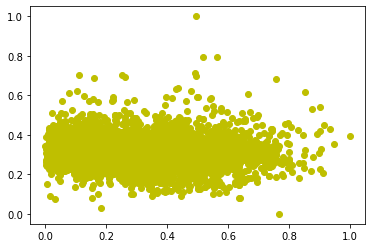

In [295]:
plt.plot(scaled_housing_info.living_score, scaled_housing_info.loneills, 'yo')

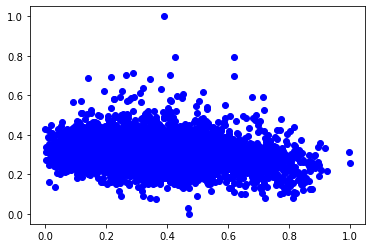

In [296]:
plt.plot(scaled_housing_info.housing_score, scaled_housing_info.loneills, 'bo')

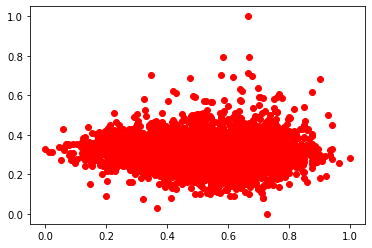

In [297]:
plt.plot(scaled_housing_info.indoor_sub_score, scaled_housing_info.loneills, 'ro')

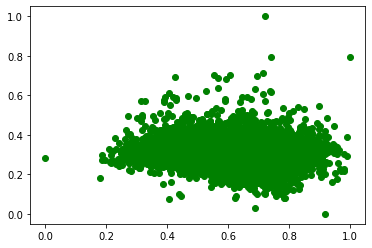

In [298]:
plt.plot(scaled_housing_info.outdoor_sub_score, scaled_housing_info.loneills, 'go')

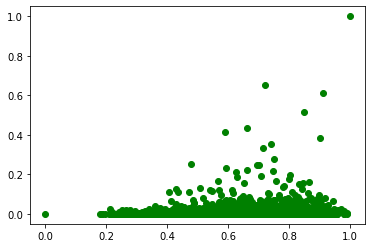

In [299]:
plt.plot(scaled_housing_info.outdoor_sub_score, scaled_housing_info.addiction_score, 'go')

In [300]:
scaled_housing_info

,outdoor_sub_score,indoor_sub_score,living_score,housing_score,loneills,addiction_score
0,0.755424,0.541743,0.365711,0.926138,0.217925,0.006626
1,0.718229,0.573095,0.366174,0.711082,0.103551,0.000000
2,0.663764,0.638534,0.406548,0.868310,0.269319,0.000000
3,0.713063,0.657674,0.476260,0.897985,0.247462,0.000000
4,0.644133,0.540831,0.268373,0.571990,0.280706,0.000000
...,...,...,...,...,...,...
6261,0.772399,0.688115,0.579337,0.307961,0.286569,0.001809
6262,0.818155,0.709078,0.655218,0.488710,0.281918,0.000000
6263,0.689742,0.627598,0.412093,0.148801,0.248619,0.000000
6264,0.760000,0.613562,0.455417,0.541068,0.370396,0.000000


In [301]:
scaled_housing_info.corr()
#calculated pearson correlation.


,outdoor_sub_score,indoor_sub_score,living_score,housing_score,loneills,addiction_score
outdoor_sub_score,1.000000,0.173219,0.501875,0.342411,-0.144527,0.148347
indoor_sub_score,0.173219,1.000000,0.882475,0.178479,-0.022490,0.067580
living_score,0.501875,0.882475,1.000000,0.324055,-0.067008,0.125576
housing_score,0.342411,0.178479,0.324055,1.000000,-0.171111,0.093915
loneills,-0.144527,-0.022490,-0.067008,-0.171111,1.000000,0.197884
addiction_score,0.148347,0.067580,0.125576,0.093915,0.197884,1.000000


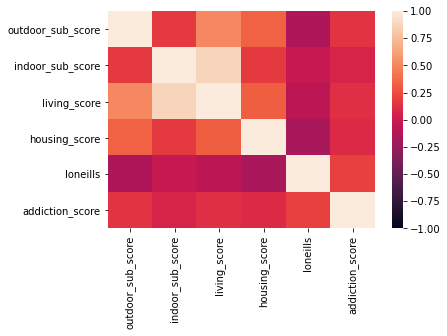

In [302]:
sns.heatmap(scaled_housing_info.corr(), vmin=-1);